In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

In [2]:
data = pd.read_csv('NCHS_-_Births_and_General_Fertility_Rates__United_States.csv')
print(data.head())


   Year  Birth Number  General Fertility Rate  Crude Birth Rate
0  1909       2718000                   126.8              30.0
1  1910       2777000                   126.8              30.1
2  1911       2809000                   126.3              29.9
3  1912       2840000                   125.8              29.8
4  1913       2869000                   124.7              29.5


In [3]:
print(data.describe())

              Year  Birth Number  General Fertility Rate  Crude Birth Rate
count   110.000000  1.100000e+02              110.000000        110.000000
mean   1963.500000  3.481454e+06               87.360909         19.618182
std      31.898276  5.944103e+05               22.574895          5.379014
min    1909.000000  2.307000e+06               59.100000         11.600000
25%    1936.250000  2.945000e+06               66.325000         14.850000
50%    1963.500000  3.637966e+06               80.750000         18.550000
75%    1990.750000  3.985681e+06              110.800000         24.425000
max    2018.000000  4.316233e+06              126.800000         30.100000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    110 non-null    int64  
 1   Birth Number            110 non-null    int64  
 2   General Fertility Rate  110 non-null    float64
 3   Crude Birth Rate        110 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.6 KB
None


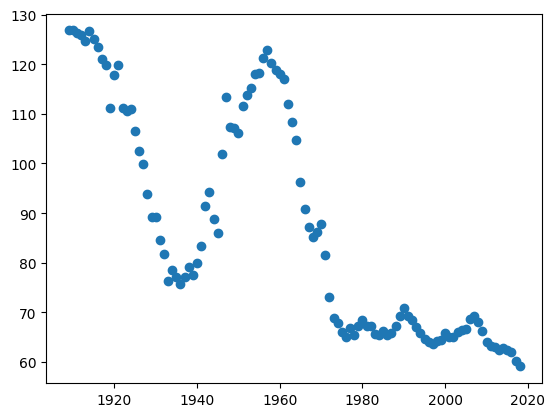

In [5]:
plt.scatter(data['Year'],data['General Fertility Rate'])

In [6]:
gfr_x = data['Year']
gfr_y = data['General Fertility Rate']

In [7]:
gfr_trainX, gfr_testX, gfr_trainY, gfr_testY = train_test_split(gfr_x, gfr_y, test_size = 0.2) 

In [8]:
gfr_trainx = np.array(gfr_trainX)
gfr_valx = np.array(gfr_testX)
gfr_trainy = np.array(gfr_trainY)
gfr_valy = np.array(gfr_testY)

In [9]:
gfr_model = np.poly1d(np.polyfit(gfr_trainx, gfr_trainy,19)) #15

C:\Users\shree\AppData\Local\Temp\ipykernel_24304\2473821929.py:1: RankWarning: Polyfit may be poorly conditioned
  gfr_model = np.poly1d(np.polyfit(gfr_trainx, gfr_trainy,19)) #15


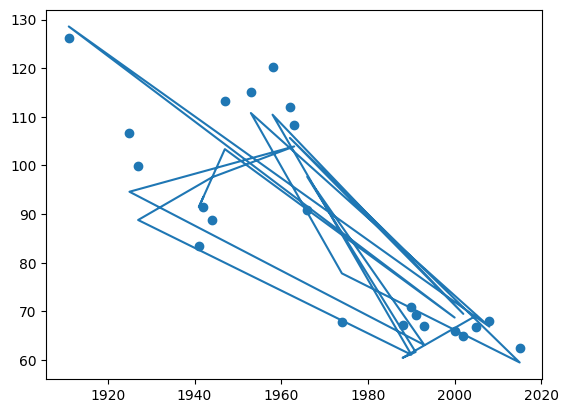

In [10]:
plt.scatter(gfr_valx,gfr_valy)
plt.plot(gfr_valx, gfr_model(gfr_valx))

In [11]:
metrics.root_mean_squared_error(gfr_valy,gfr_model(gfr_valx))

7.063873206873751

In [12]:
metrics.mean_absolute_percentage_error(gfr_valy,gfr_model(gfr_valx))

0.07311321253642543

In [13]:
metrics.median_absolute_error(gfr_valy,gfr_model(gfr_valx))

np.float64(6.599813842773436)

In [14]:
metrics.max_error(gfr_valy,gfr_model(gfr_valx))

np.float64(12.005212402343744)

In [15]:
metrics.explained_variance_score(gfr_valy,gfr_model(gfr_valx))

0.8967770609482677

In [36]:
data['Normalized Year'] = data['Year']/100

In [37]:
cbr_X = data[['Normalized Year', 'General Fertility Rate']]
cbr_Y = data['Crude Birth Rate']
cbr_trainX, cbr_testX, cbr_trainY, cbr_testY = train_test_split(cbr_X, cbr_Y, test_size = 0.2)

In [38]:
cbr_trainx = np.array(cbr_trainX)
cbr_trainy = np.array(cbr_trainY)
cbr_valx = np.array(cbr_testX)
cbr_valy = np.array(cbr_testY)

In [39]:
cbr_model = svm.SVR()
cbr_model.fit(cbr_trainx, cbr_trainy)

SVR()

In [40]:
cbr_predy = np.array(cbr_model.predict(cbr_valx))

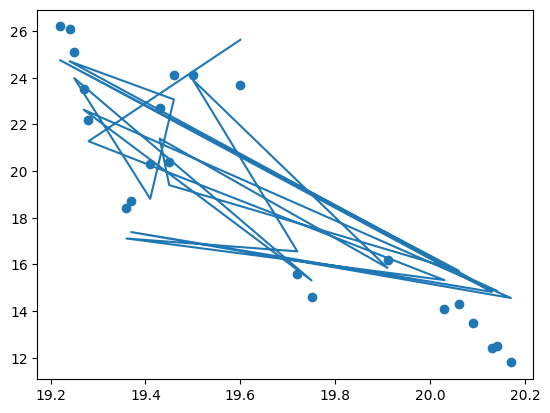

In [41]:
plt.scatter(cbr_valx[:,0], cbr_valy)
plt.plot(cbr_valx[:,0], cbr_predy)

In [44]:
metrics.root_mean_squared_error(cbr_valx[:,0], cbr_predy)

4.140275565684337

In [46]:
metrics.mean_absolute_percentage_error(cbr_valx[:,0], cbr_predy)

0.19303847575274197

In [47]:
metrics.median_absolute_error(cbr_valx[:,0], cbr_predy)

np.float64(4.369818533692489)

In [48]:
metrics.max_error(cbr_valx[:,0], cbr_predy)

np.float64(6.029703344437461)

In [49]:
metrics.explained_variance_score(cbr_valx[:,0], cbr_predy)

-149.23823191844969